In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

##Data Preparation

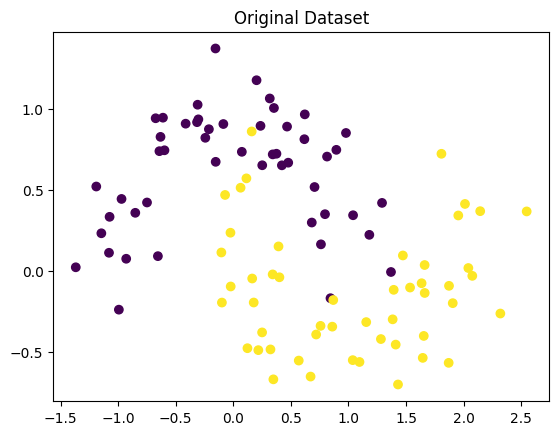

In [30]:
# Generate a complicated dataset
X, y = datasets.make_moons(n_samples=100, noise=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Dataset")
plt.show()

##Polynomial Kernel Function
Implement polynomial kernel function from scratch, and then use SVM classifier to perform classification task. The decision boundary is shown at the end of this section

In [34]:
# Implement Polynomial Kernel Function
def polynomial_kernel(x, y, degree=3, c=1):
    return (np.dot(x, y) + c) ** degree

# Compute Kernel Matrix
def compute_kernel_matrix(X):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = polynomial_kernel(X[i], X[j])
    return K

In [35]:
# Compute and plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]

    # Compute kernel matrix for the grid points
    K_grid = np.array([[polynomial_kernel(x, y) for y in X] for x in points])

    Z = clf.predict(K_grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.show()

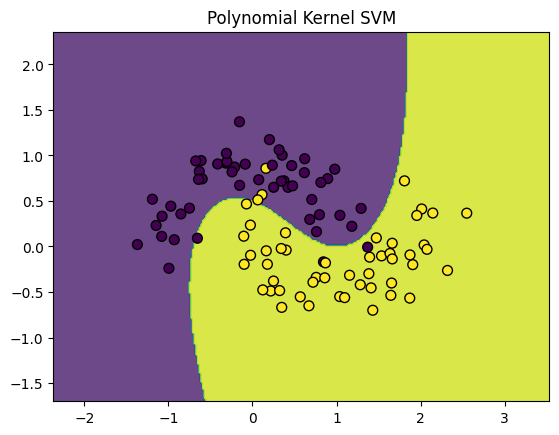

In [36]:
# Polynomial Kernel SVM
K_poly = compute_kernel_matrix(X)
clf_poly = SVC(kernel='precomputed')
clf_poly.fit(K_poly, y)
plot_decision_boundary(clf_poly, X, y, "Polynomial Kernel SVM")

##Radial Basis Function (RBF) or Gaussian Kernel
Implement RBF kernel from scratch and use SVM classifier to perform classification task

In [26]:
# Implement Radial Basis Function (RBF) Kernel
def rbf_kernel(x, y, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

# Compute Kernel Matrix
def compute_kernel_matrix(X):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf_kernel(X[i], X[j])
    return K

In [27]:
# Compute and plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]

    # Compute kernel matrix for the grid points
    K_grid = np.array([[rbf_kernel(x, y) for y in X] for x in points])

    Z = clf.predict(K_grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.show()

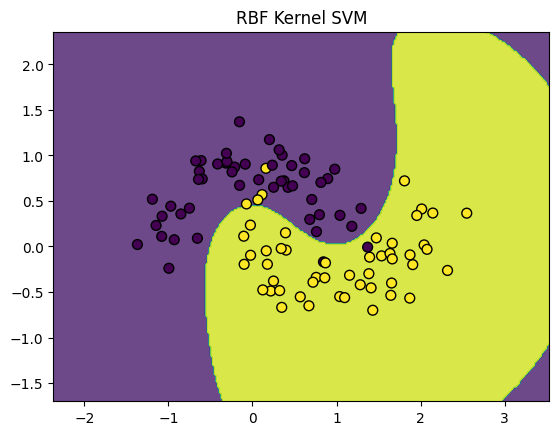

In [28]:
# RBF Kernel SVM
K_rbf = compute_kernel_matrix(X)
clf_rbf = SVC(kernel='precomputed')
clf_rbf.fit(K_rbf, y)
plot_decision_boundary(clf_rbf, X, y, "RBF Kernel SVM")